In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

newdf = pd.read_excel('Volve production data.xlsx')

In [3]:
#Roundinf off the data to the nearest integer
newdf = np.round(newdf)

In [4]:
#Data is highly skewed and depends on the well,hence i have used padding to fill the missing values 
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')


In [5]:
#Carrying out dimensionality reduction on the original dataframe
#Dropping unnecessary features: WELL_BORE_CODE, NPD_WELL_BORE_NAME, NPD_FIELD_NAME, NPD_FIELD_CODE,NPD_FACILITY_CODE,NPD_FACILITY_NAME

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = newdf.drop(to_drop, axis=1)
#print(newdf.info())

In [6]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P']])


#Taking the data of wells 2 to 4 since they were the ones with the east number of missing values
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()

In [7]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

In [8]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [9]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

In [10]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = reg_all.predict(x_test_final)

In [12]:
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_final, y_test_final))

The R2 value for linear regression for oil volume production is 0.5542109655694217


In [13]:
# Applying Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(x_train_final, y_train_final)

ridge_pred = ridge.predict(x_test_final)

print("The R2 value for Ridge regression for oil volume production is",ridge.score(x_test_final, y_test_final))

The R2 value for Ridge regression for oil volume production is 0.5452640363101314


In [14]:
X_test.groupby(['NPD_WELL_BORE_CODE']).agg({"DATEPRD":"count"})

,DATEPRD
NPD_WELL_BORE_CODE,
5351,910
5599,914
7078,360


In [24]:
from sklearn import svm 
clf = svm.SVC(kernel = 'rbf')  # kernel = gaussian,vanilla dot,rbf..........rbf has best accuracy
clf.fit(x_train_final,y_train_final)
y_pred_svm = clf.predict(x_test_final)

In [25]:
print(clf.score(x_test_final, y_test_final))

0.0924908424908425


In [38]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg1.fit(x_train_final,y_train_final)
reg2.fit(x_train_final,y_train_final)
print(reg1.score(x_test_final, y_test_final))
print(reg2.score(x_test_final, y_test_final))


0.9613491318277433
0.9806588684095824


In [15]:
from sklearn.tree import DecisionTreeRegressor
modell = DecisionTreeRegressor()
modell.fit(x_train_final, y_train_final)
print("The R2 value for Decision Tree Regressor for oil volume production is",modell.score(x_test_final, y_test_final))

The R2 value for Decision Tree Regressor for oil volume production is 0.9711722051898112


## Actual V/S Model Prediction plot for Well No.- 5599

### Linear Regression

The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872038


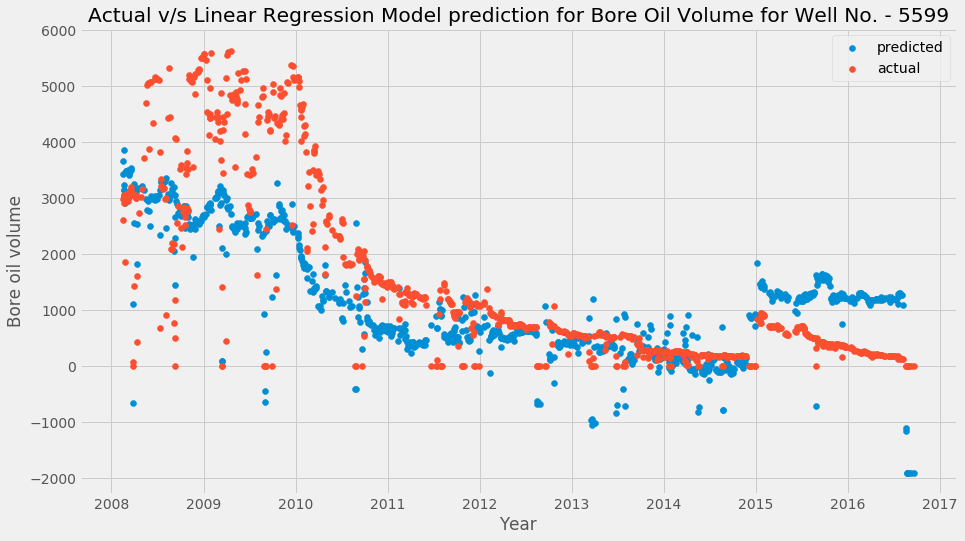

In [42]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5599final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))


The R2 value for Ridge regression for oil volume production in well 5599 is 0.5465630827188313


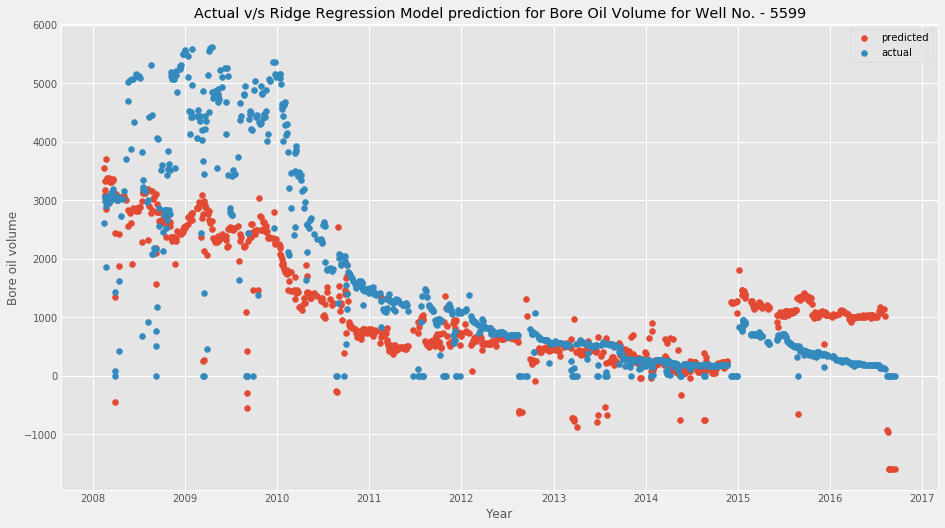

In [43]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
y_pred = ridge.predict(x_test_5599final)
plt.style.use('ggplot')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Ridge Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for Ridge regression for oil volume production in well 5599 is", ridge.score(x_test_5599final,y_test_5599_final ))

### Gradient Boosting Regressor

Text(0,0.5,'Bore oil volume')

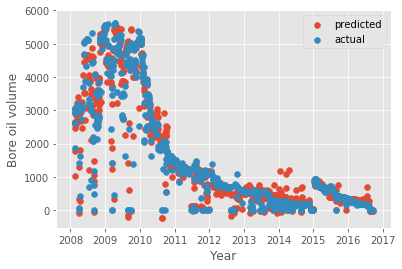

In [41]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)



y_pred = reg1.predict(x_test_5599final)

plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")

### Random Forest Regressor

Text(0,0.5,'Bore oil volume')

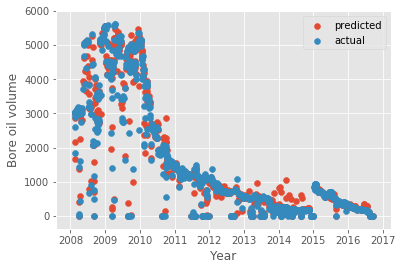

In [42]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)



y_pred = reg2.predict(x_test_5599final)

plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")

### Decision Tree Regression

The R2 value for Decision Tree regression for oil volume production in well 5599 is 0.9733816025379906


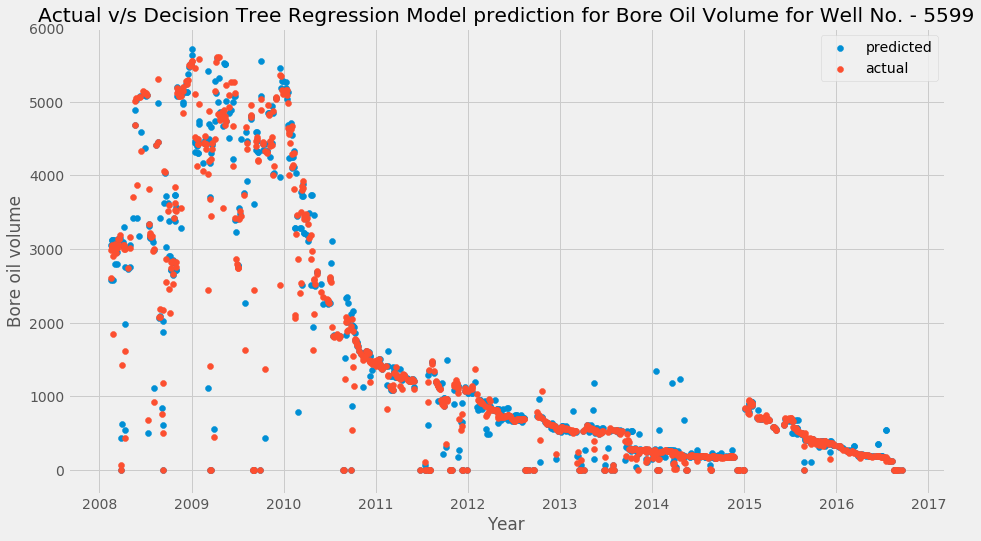

In [44]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)



y_pred = modell.predict(x_test_5599final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Decision Tree Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for Decision Tree regression for oil volume production in well 5599 is", modell.score(x_test_5599final,y_test_5599_final ))

The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872038
The R2 value for Ridge regression for oil volume production in well 5599 is 0.5465630827188313
The R2 value for Decision Tree regression for oil volume production in well 5599 is 0.9733816025379906


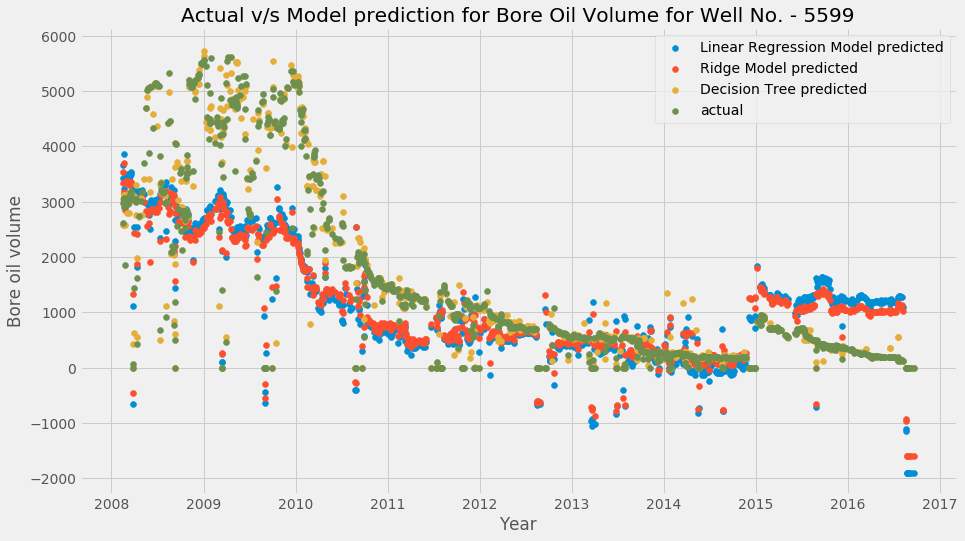

In [53]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5599final)
y_ridge = ridge.predict(x_test_5599final)
y_pred = modell.predict(x_test_5599final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_ridge,label='Ridge Model predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='Decision Tree predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))

print("The R2 value for Ridge regression for oil volume production in well 5599 is", ridge.score(x_test_5599final,y_test_5599_final ))

print("The R2 value for Decision Tree regression for oil volume production in well 5599 is", modell.score(x_test_5599final,y_test_5599_final ))

## Actual V/S Model Prediction plot for Well No.- 5351

### Linear Regression

The R2 value for linear regression for oil volume production is 0.6750225210254925


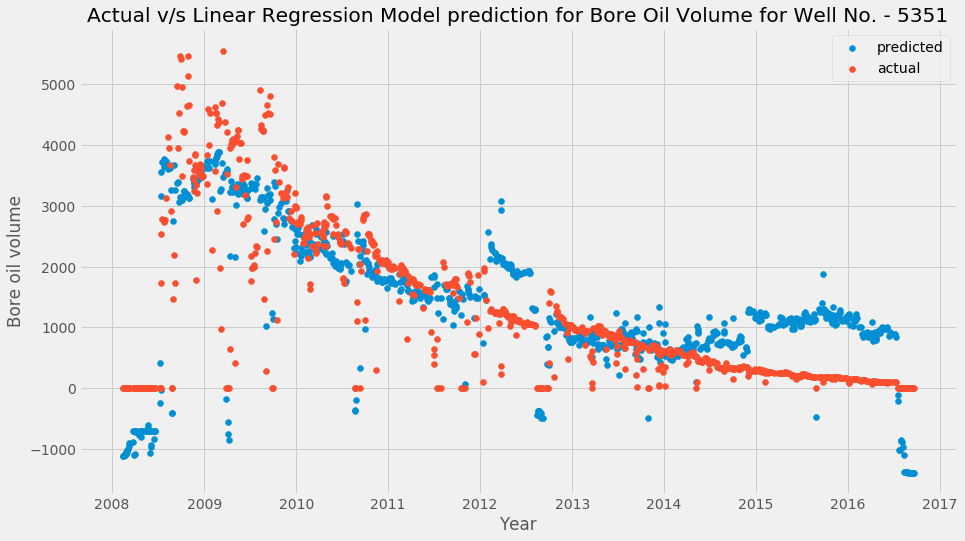

In [45]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5351final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_5351final,y_test_5351_final ))


### Ridge Regression

The R2 value for ridge regression for oil volume production is 0.6700863532606584


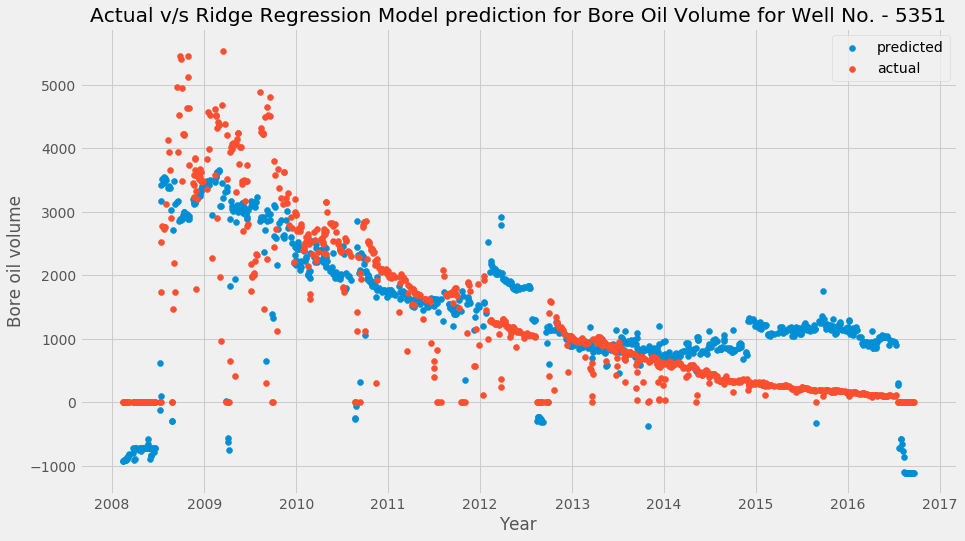

In [58]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = ridge.predict(x_test_5351final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Ridge Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for ridge regression for oil volume production is", ridge.score(x_test_5351final,y_test_5351_final ))

The R2 value for Decision Tree regression for oil volume production is 0.968009268122384


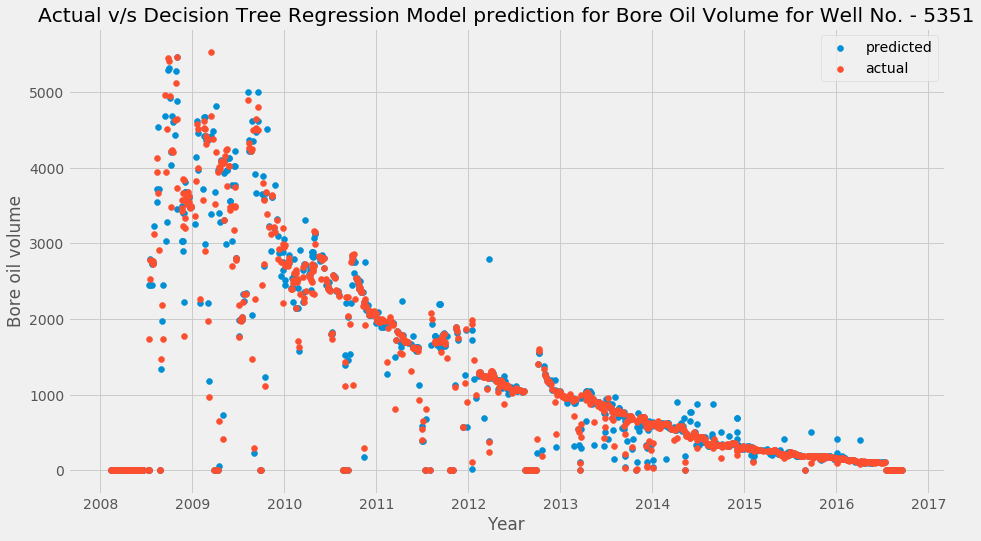

In [57]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = modell.predict(x_test_5351final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Decision Tree Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for Decision Tree regression for oil volume production is", modell.score(x_test_5351final,y_test_5351_final ))

The R2 value for linear regression for oil volume production is 0.6750225210254925
The R2 value for ridge regression for oil volume production is 0.6700863532606584
The R2 value for Decision Tree regression for oil volume production is 0.968009268122384


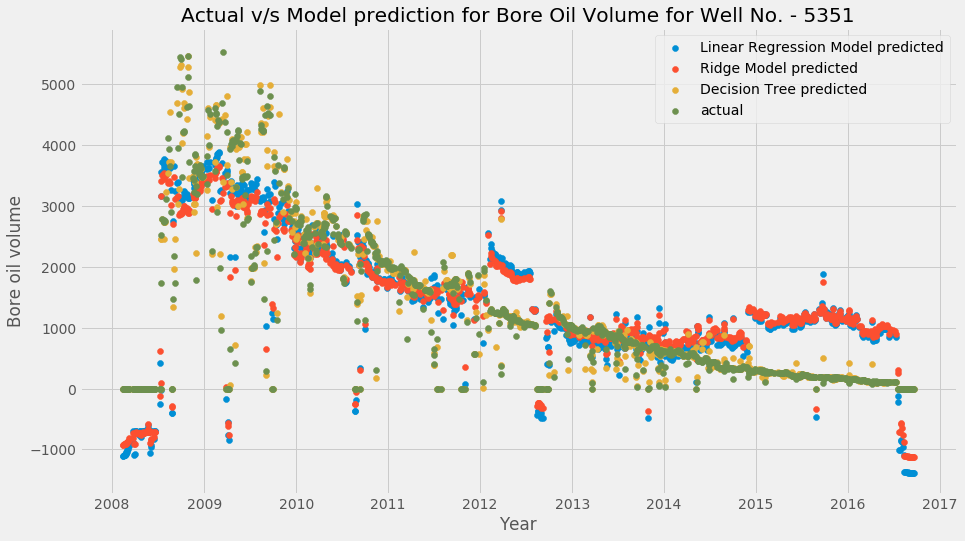

In [56]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5351final)
y_ridge = ridge.predict(x_test_5351final)
y_pred = modell.predict(x_test_5351final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_ridge,label='Ridge Model predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='Decision Tree predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')

print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_5351final,y_test_5351_final ))
print("The R2 value for ridge regression for oil volume production is", ridge.score(x_test_5351final,y_test_5351_final ))
print("The R2 value for Decision Tree regression for oil volume production is", modell.score(x_test_5351final,y_test_5351_final ))

## Actual V/S Model Prediction plot for Well No.- 7078

### Linear Regression

The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511264807


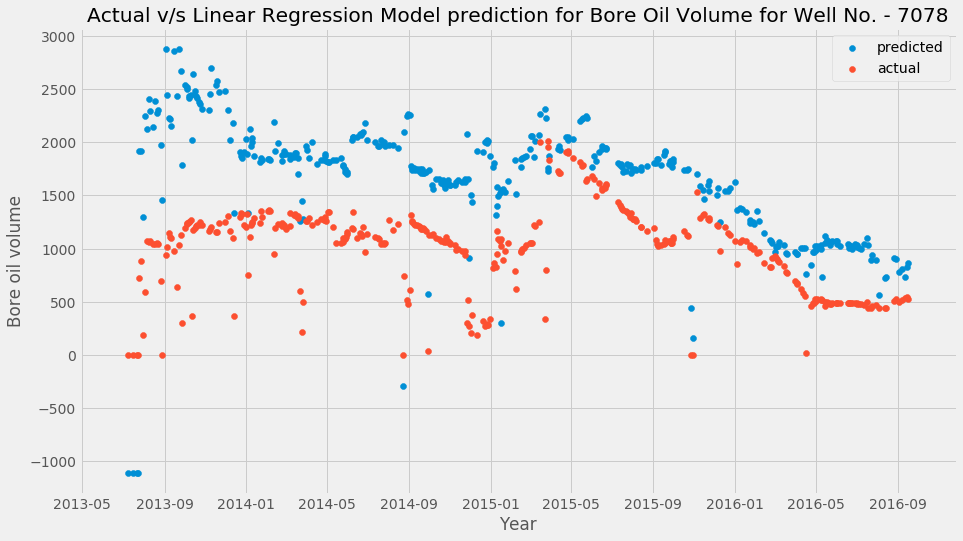

In [49]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_7078final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 7078')

y_test_7078_final = y_test_7078['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))


The R2 value for Ridge regression for oil volume production in well 7078 is -3.3712473012545274


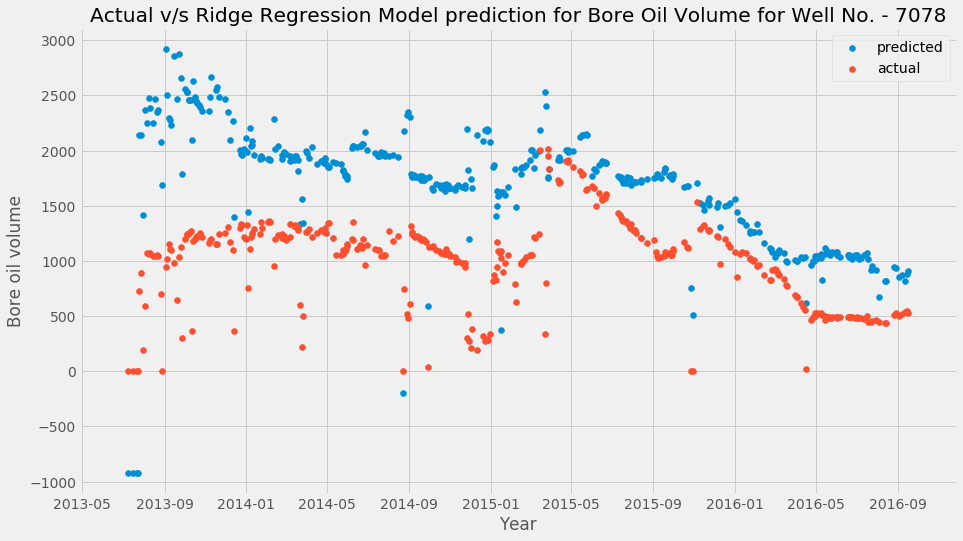

In [55]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = ridge.predict(x_test_7078final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Ridge Regression Model prediction for Bore Oil Volume for Well No. - 7078')

y_test_7078_final = y_test_7078['BORE_OIL_VOL']
print("The R2 value for Ridge regression for oil volume production in well 7078 is", ridge.score(x_test_7078final,y_test_7078_final ))


The R2 value for Decision Tree regression for oil volume production in well 7078 is 0.9245701274105963


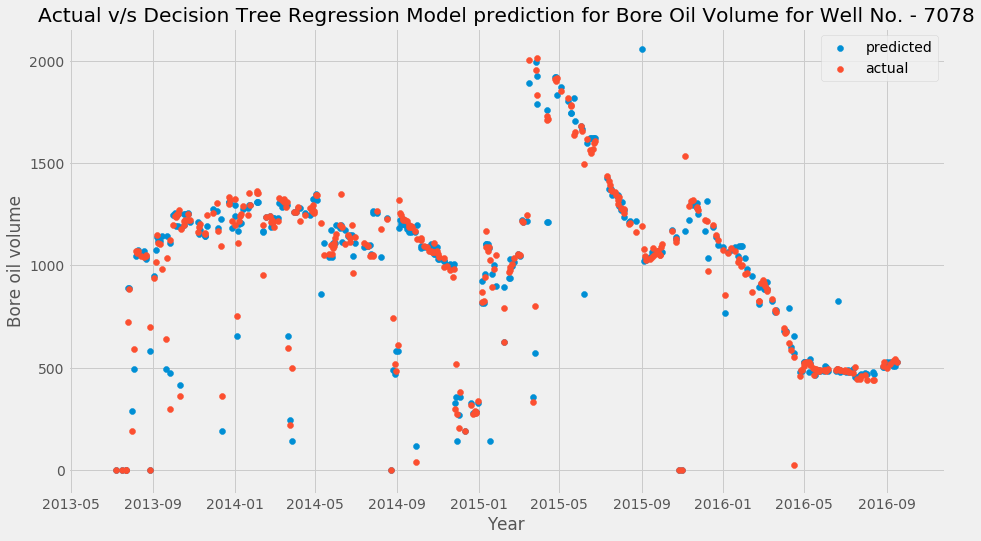

In [59]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = modell.predict(x_test_7078final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Decision Tree Regression Model prediction for Bore Oil Volume for Well No. - 7078')

y_test_7078_final = y_test_7078['BORE_OIL_VOL']
print("The R2 value for Decision Tree regression for oil volume production in well 7078 is", modell.score(x_test_7078final,y_test_7078_final ))



The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511264807
The R2 value for Ridge regression for oil volume production in well 7078 is -3.3712473012545274
The R2 value for Decision Tree regression for oil volume production in well 7078 is 0.9245701274105963


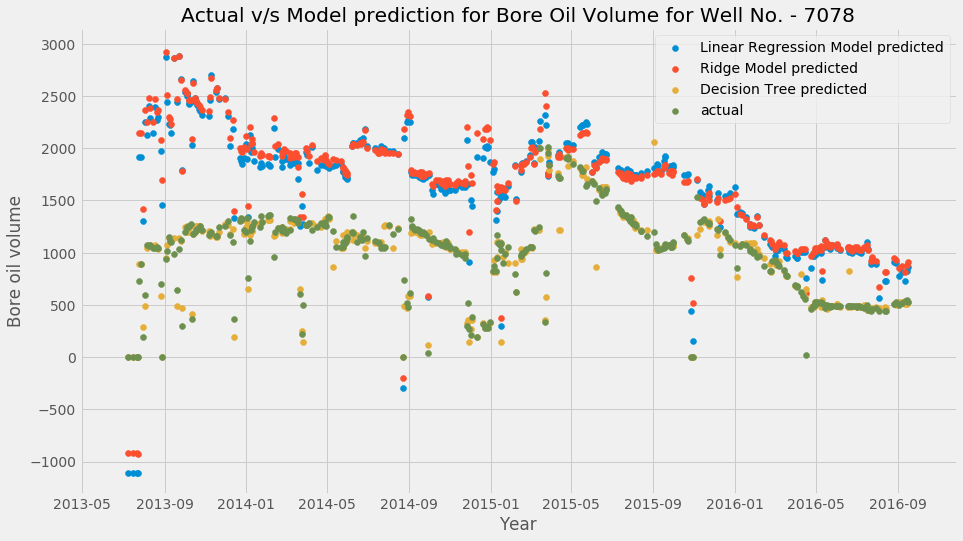

In [60]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_7078final)
y_ridge = ridge.predict(x_test_7078final)
y_pred = modell.predict(x_test_7078final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_ridge,label='Ridge Model predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='Decision Tree predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 7078')

print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))
print("The R2 value for Ridge regression for oil volume production in well 7078 is", ridge.score(x_test_7078final,y_test_7078_final ))
print("The R2 value for Decision Tree regression for oil volume production in well 7078 is", modell.score(x_test_7078final,y_test_7078_final ))
